### Ejercitación 

1. Resolver el problema de la XOR con 3 neuronas
 
    a. Implementar SGD para resolver la XOR. 
 
    b. ¿Cuántos parámetros desconocidos tiene el modelo? 
 
    c. ¿Cuáles son los hiper-parámetros del modelo? Explicar que pasa cuando se varía el learning rate. 
 
    d. Una vez entrenado el modelo, realizar predicciones para verificar el funcionamiento.

In [1]:
# %load_ext lab_black

import numpy as np
from matplotlib import pyplot as plt

a.

In [2]:
class XorNeuralNetwork:
    def initializeParameters(self, n_features, n_hidden, n_outputs):
        W1 = np.random.rand(n_hidden, n_features)
        W2 = np.random.rand(n_outputs, n_hidden)
        b1 = np.zeros((n_hidden, 1))
        b2 = np.zeros((n_outputs, 1))
        self.params = (W1, W2, b1, b2)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y, epochs, learning_rate):
        self.initializeParameters(2, 2, 1)

        history = []
        n = X.shape[0]

        for _ in range(epochs):
            for i in range(n):
                self.forwardPropagation(X[i].reshape(1, -1), Y[:, i])
                self.backwardPropagation(X[i].reshape(1, -1), Y[:, i], learning_rate)
            history.append(self.cost[0][0])

        return history

    def forwardPropagation(self, x, y):
        W1, W2, b1, b2 = self.params
        Z1 = W1 @ x.T + b1
        A1 = self.sigmoid(Z1)
        Z2 = W2 @ A1 + b2

        self.cache = (Z1, A1, Z2)
        self.cost = (y - Z2) ** 2

    def backwardPropagation(self, x, y, learning_rate):
        W1, W2, b1, b2 = self.params
        Z1, A1, Z2 = self.cache

        dZ2 = -2 * (y - Z2)
        dW2 = dZ2 @ A1.T
        db2 = dZ2

        dA1 = W2.T @ dZ2
        dZ1 = dA1 * (A1 * (1 - A1))
        dW1 = dZ1 @ x
        db1 = dZ1

        self.params = (
            W1 - learning_rate * dW1,
            W2 - learning_rate * dW2,
            b1 - learning_rate * db1,
            b2 - learning_rate * db2,
        )

    def predict(self, x):
        W1, W2, b1, b2 = self.params
        Z1 = W1 @ x.T + b1
        A1 = self.sigmoid(Z1)
        return W2 @ A1 + b2

b. El modelo tiene 9 parámetros desconocidos. Estos son *w<sub>11</sub><sup>(1)</sup>*, *w<sub>12</sub><sup>(1)</sup>*, *b<sub>1</sub><sup>(1)</sup>* para la primer neurona de la primer capa, *w<sub>21</sub><sup>(1)</sup>*, *w<sub>22</sub><sup>(1)</sup>*, *b<sub>2</sub><sup>(1)</sup>* para la segunda neurona de la primer capa y *w<sub>1</sub><sup>(2)</sup>*, *w<sub>2</sub><sup>(2)</sup>*, *b<sup>(2)</sup>* para la neurona de la capa de salida.

c. Los hiper-parámetros son el learning rate y el número de neuronas por capa y el número de epochs de entrenamiento.

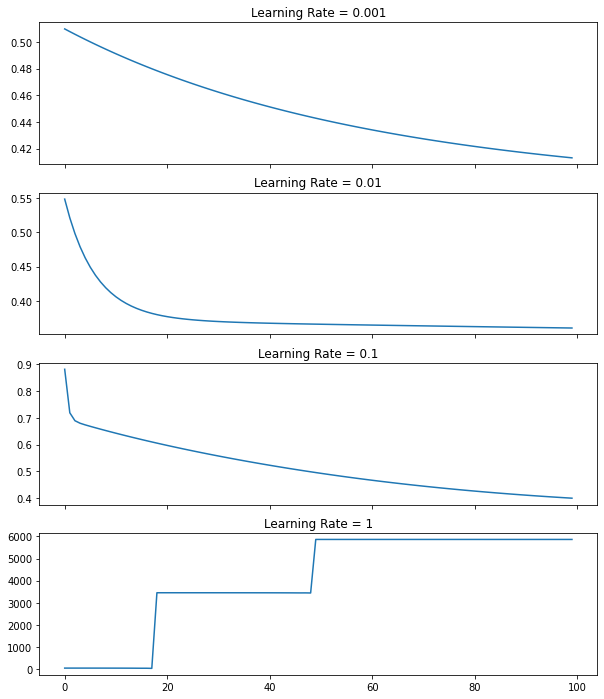

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0, 1, 1, 0]])
learning_rates = [0.001, 0.01, 0.1, 1]

figure, axis = plt.subplots(len(learning_rates), sharex=True, figsize=(10, 12))

for i, learning_rate in enumerate(learning_rates):
    history = XorNeuralNetwork().fit(X, Y, 100, learning_rate)
    axis[i].plot(history)
    axis[i].set_title(f"Learning Rate = {learning_rate}")

Al variar el learning rate varía el número de epochs necesarios para disminuir el error.

- Para un learning rate de 0.001 se puede observar que el training loss se reduce muy poco entre epochs, esto se debe a a que el learning rate es muy pequeño y el número necesario de iteraciones para converger a una solución es mayor.

- Un learning rate de 0.01 parece ser óptimo, ya que el training loss disminuye rapido entre epochs. Observando la gráfica se puede deducir que el modelo está entrenado luego de aproximadamente 30 epochs.

- Utilizando un learning rate de 0.1 se ve que, durante los primeros epochs, el training loss diminuye muy rápido pero luego la pendiente disminuye y la mejora entre epochs se vuelve más lenta.

- Al usar un learning rate con un valor de 1 el training loss aumenta a medida que se aumenta el número de epochs. Por lo tanto se puede deducir que el modelo diverge y el learning rate es demasiado grande.

Según el análisis realizado el valor óptimo para el learning rate es 0.01.

d.

In [5]:
X_test = np.array([[0, 1], [1, 1], [1, 0], [0, 0]])
Y_test = np.array([[1, 0, 1, 0]])

xor_nn = XorNeuralNetwork()
xor_nn.fit(X, Y, 100, 0.01)
pred = xor_nn.predict(X_test)
print(f"Predicción: {np.rint(pred).reshape(-1)}")
print(f"Real: {Y_test.reshape(-1)}")

Predicción: [0. 1. 1. 0.]
Real: [1 0 1 0]


#### Dudas luego de realizado el ejercicio

Luego de realizar la actividad hay cuestiones que no me quearon del todo claras.

- En el ejemplo visto en clase no utilizamos una función de activación para la salida. Por lo que entendí esto es lo que se debe hacer en un problema de regresión, pero el problema en este caso es de clasificación binaria, ya que las salidas son 0 y 1. Mi duda es, por que no usar una función de activación en la salida?
- Por que el modelo tiene una performance tan mala? Siendo que el problema a resolver es simple.